<a href="https://colab.research.google.com/github/ViniCostSantos/aquivos-teste/blob/main/Machine_Learning_%26%26_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

In [ ]:
# lembrado que os investimentos estão em milhares e as vendas em milhões
# importando a base de dados
import pandas as pd

tabela = pd.read_csv(r"C:\Users\Vinicius Costa\Desktop\Jupyter\dados\advertising.csv")

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


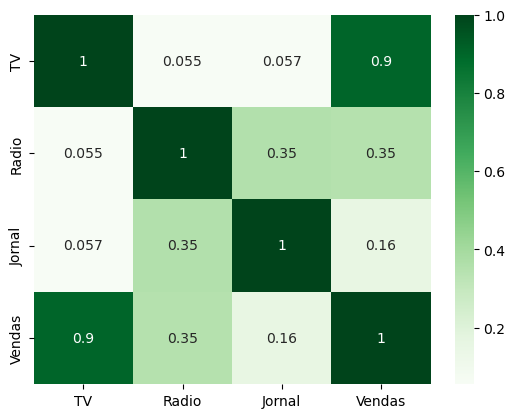

In [ ]:
# correlação dos investimentos com as vendas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(tabela.corr())

# criar gráfico
#sns.barplot(x='State', y="Growth", data=df)
sns.heatmap(tabela.corr(), cmap = "Greens", annot = True)
# exibir gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

display(x)
display(y)


,TV,Radio,Jornal
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Vendas, Length: 200, dtype: float64

In [ ]:
# dividindo a tabela em treino e teste para a nossa IA
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3)

In [ ]:
# importando a inteligência artificial

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criando as IAs

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinando as IAs

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [ ]:
# fazendo a previsão para os valores de teste

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# testando a previsão

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9124242925596575
0.9613975039924156


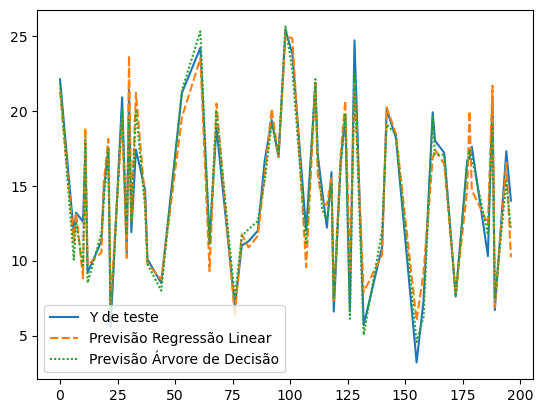

In [ ]:
# vizualização gráfica das previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Y de teste"] = y_teste
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsão Árvore de Decisão"] = previsao_arvoredecisao

#display(tabela_auxiliar)
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [ ]:
# fazendo novas previsões
import pandas as pd
tabela_nova = pd.read_csv(r"C:\Users\Vinicius Costa\Desktop\Jupyter\dados\novos.csv")
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.239  8.673 19.978]


In [ ]:
tabela_nova["Vendas"]= previsao
display(tabela_nova)

,TV,Radio,Jornal,Vendas
0,23.1,3.8,69.2,7.239
1,44.5,0.0,5.1,8.673
2,170.2,45.9,0.0,19.978
